Importando Dados e blibiotecas


In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [145]:
dfclientes= pd.read_csv("./clientes.csv", sep=",",header=0)
dfpedidos= pd.read_csv("./pedidos.csv", sep=",",header=0)
dfprodutos= pd.read_csv("./produtos.csv", sep=",",header=0)
dfvendas = pd.read_csv("./vendas.csv", sep=",",header=0)
pd.set_option('display.float_format', '{:.2f}'.format)

Visualizando os Dataframes.

In [146]:
dfclientes

,id_cliente,razao_social,pais,uf,municipio
0,7082,Silveira,BRASIL,MG,COROMANDEL
1,4951,Cunha - Me,BRASIL,AC,CRUZEIRO DO SUL
2,2560,Da Cunha Gonçalves - Ei,BRASIL,AC,BUJARI
3,23880,Mendes,BRASIL,AC,RIO BRANCO
4,17500,Da Rosa,BRASIL,MG,EXTREMA
...,...,...,...,...,...
30127,5380,Pacheco S/A,BRASIL,SC,JARAGUA DO SUL
30128,25446,Viana,BRASIL,SC,CRICIUMA
30129,9218,Ramos Das Neves Ltda.,BRASIL,RS,CAXIAS DO SUL
30130,29113,Farias,BRASIL,PR,CURITIBA


In [147]:
dfpedidos

,id_pedido,id_produto,item,quantidade,desconto
0,219412,1163,1,12,0.00
1,840661,76569,8,12,-0.19
2,834381,59833,4,12,-0.15
3,830692,832,3,12,0.00
4,230829,21977,2,60,-0.08
...,...,...,...,...,...
2024431,498880,20977,1,12,0.00
2024432,435570,24621,3,12,0.00
2024433,838647,65044,4,12,0.00
2024434,435621,43756,5,12,0.00


In [148]:
dfprodutos

,id_produto,tipo_produto,material,cor,preco
0,1163,TÊNIS,GASPEA PRONTA LINHO LISBOA,PRETO,75.95
1,76569,SANDÁLIAS,PELICA/NAPA PELE STRECH,BRANCO OFF,59.97
2,59833,SANDÁLIAS,NAPA TURIM,PRETO,48.42
3,832,FLATS,TIRA PRONTA CAMURCA FLEX,PRETO,39.48
4,21977,SANDÁLIAS,NAPA TURIM/TIRA PRONTA STRASS,CRISTAL/CREME/BRANCO OFF,57.32
...,...,...,...,...,...
56204,76959,SAPATOS,NAPA FLOATHER NATURE,ARGILA,94.19
56205,78331,SAPATOS,NAPA TURIM,PRETO,42.67
56206,76606,TÊNIS,NAPA LINHO GLAM/METALIZADO PREMIUM,NUDE/OURO ROSADO,62.58
56207,78063,TÊNIS,NAPA TURIM,PRETO,41.12


In [149]:
dfvendas

,data,id_pedido,id_cliente,status
0,2023-01-02,14233,935,faturado
1,2023-01-02,13835,20017,faturado
2,2023-01-02,13747,2192,faturado
3,2023-01-02,14303,262,cancelado
4,2023-01-02,13942,6612,faturado
...,...,...,...,...
607471,2025-03-31,882093,23515,faturado
607472,2025-03-31,880971,18471,faturado
607473,2025-03-31,880696,16610,faturado
607474,2025-03-31,880983,10430,aberto


Depois de visualizar os dataframes, reconheci que talvez seja melhor juntar todos respeitando as chaves primárias e utilizando alguns left JOIN, em todos arquivos para unificar tudo em um arquivo só. Assim ficará interessante e mais fácil realizar análises:

In [150]:
df_main = dfvendas \
    .merge(dfpedidos, on="id_pedido", how="left") \
    .merge(dfprodutos, on="id_produto", how="left") \
    .merge(dfclientes, on="id_cliente", how="left")

In [151]:
df_main

,data,id_pedido,id_cliente,status,id_produto,item,quantidade,desconto,tipo_produto,material,cor,preco,razao_social,pais,uf,municipio
0,2023-01-02,14233,935,faturado,14676,1,12,-0.08,BOTAS,TELA VENEZA/NAPA BERLIM,PRETO,101.85,Das Neves,BRASIL,MG,ITAGUARA
1,2023-01-02,13835,20017,faturado,14786,1,16,-0.14,BOTAS,NAPA FLOATHER ZURIQUE/ELASTICO,PRETO,117.34,Alves - Ei,BRASIL,PR,CURITIBA
2,2023-01-02,13747,2192,faturado,16566,1,8,-0.08,BOTAS,METALIZADO LISBOA,GRAFITE,155.58,Fernandes,BRASIL,MG,VICOSA
3,2023-01-02,13747,2192,faturado,16438,2,8,-0.08,BOTAS,NAPA BERLIM,PRETO,144.92,Fernandes,BRASIL,MG,VICOSA
4,2023-01-02,14303,262,cancelado,8214,2,12,-0.17,SANDÁLIAS,NAPA FLOATHER NATURE,PRETO,70.43,Da Rosa,BRASIL,MG,BELO HORIZONTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024431,2025-03-31,880983,10430,aberto,67341,1,12,-0.08,SANDÁLIAS,PELICA/T P PELICA/T P PELE STRECH,BRANCO OFF,74.06,Da Cunha Costela - Ei,BRASIL,BA,SANTANA
2024432,2025-03-31,880983,10430,aberto,39036,2,12,-0.08,SANDÁLIAS,PELICA,BEGE,53.78,Da Cunha Costela - Ei,BRASIL,BA,SANTANA
2024433,2025-03-31,881440,27813,faturado,59636,3,12,-0.06,FLATS,NP FLOAT NAT/NP LEZ PARIS/TI FLOREN,CREME/BRANCO-CRISTAL,49.47,Da Rosa,BRASIL,MG,MANHUACU
2024434,2025-03-31,881440,27813,faturado,51315,2,12,-0.06,FLATS,NP FLOATHER NATURE/TIRA FLORENCA,PRETO/CRISTAL,44.45,Da Rosa,BRASIL,MG,MANHUACU


In [152]:
df_main.dtypes

data             object
id_pedido         int64
id_cliente        int64
status           object
id_produto        int64
item              int64
quantidade        int64
desconto        float64
tipo_produto     object
material         object
cor              object
preco           float64
razao_social     object
pais             object
uf               object
municipio        object
dtype: object

In [153]:
df_main['data'] = pd.to_datetime(df_main['data'])

In [154]:
df_main.dtypes

data            datetime64[ns]
id_pedido                int64
id_cliente               int64
status                  object
id_produto               int64
item                     int64
quantidade               int64
desconto               float64
tipo_produto            object
material                object
cor                     object
preco                  float64
razao_social            object
pais                    object
uf                      object
municipio               object
dtype: object

Procedimento para conversão da coluna data para padrão brasileiro.

In [155]:
df_main['data'] = df_main['data'].dt.strftime('%d/%m/%Y')

In [156]:
df_main

,data,id_pedido,id_cliente,status,id_produto,item,quantidade,desconto,tipo_produto,material,cor,preco,razao_social,pais,uf,municipio
0,02/01/2023,14233,935,faturado,14676,1,12,-0.08,BOTAS,TELA VENEZA/NAPA BERLIM,PRETO,101.85,Das Neves,BRASIL,MG,ITAGUARA
1,02/01/2023,13835,20017,faturado,14786,1,16,-0.14,BOTAS,NAPA FLOATHER ZURIQUE/ELASTICO,PRETO,117.34,Alves - Ei,BRASIL,PR,CURITIBA
2,02/01/2023,13747,2192,faturado,16566,1,8,-0.08,BOTAS,METALIZADO LISBOA,GRAFITE,155.58,Fernandes,BRASIL,MG,VICOSA
3,02/01/2023,13747,2192,faturado,16438,2,8,-0.08,BOTAS,NAPA BERLIM,PRETO,144.92,Fernandes,BRASIL,MG,VICOSA
4,02/01/2023,14303,262,cancelado,8214,2,12,-0.17,SANDÁLIAS,NAPA FLOATHER NATURE,PRETO,70.43,Da Rosa,BRASIL,MG,BELO HORIZONTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024431,31/03/2025,880983,10430,aberto,67341,1,12,-0.08,SANDÁLIAS,PELICA/T P PELICA/T P PELE STRECH,BRANCO OFF,74.06,Da Cunha Costela - Ei,BRASIL,BA,SANTANA
2024432,31/03/2025,880983,10430,aberto,39036,2,12,-0.08,SANDÁLIAS,PELICA,BEGE,53.78,Da Cunha Costela - Ei,BRASIL,BA,SANTANA
2024433,31/03/2025,881440,27813,faturado,59636,3,12,-0.06,FLATS,NP FLOAT NAT/NP LEZ PARIS/TI FLOREN,CREME/BRANCO-CRISTAL,49.47,Da Rosa,BRASIL,MG,MANHUACU
2024434,31/03/2025,881440,27813,faturado,51315,2,12,-0.06,FLATS,NP FLOATHER NATURE/TIRA FLORENCA,PRETO/CRISTAL,44.45,Da Rosa,BRASIL,MG,MANHUACU


In [157]:
df_main.to_csv('bancofull.csv', index=False, encoding='utf-8-sig')

Tem muitas colunas com tipos incorretos, iniciando processo de conversão.

In [158]:
df_main['data'] = pd.to_datetime(df_main['data'], dayfirst=True)



In [159]:
df_main.dtypes

data            datetime64[ns]
id_pedido                int64
id_cliente               int64
status                  object
id_produto               int64
item                     int64
quantidade               int64
desconto               float64
tipo_produto            object
material                object
cor                     object
preco                  float64
razao_social            object
pais                    object
uf                      object
municipio               object
dtype: object

In [160]:
df_main['id_pedido'] = df_main['id_pedido'].astype(str)
df_main['id_cliente'] = df_main['id_cliente'].astype(str)
df_main['id_produto'] = df_main['id_produto'].astype(str)


In [161]:
df_main.dtypes

data            datetime64[ns]
id_pedido               object
id_cliente              object
status                  object
id_produto              object
item                     int64
quantidade               int64
desconto               float64
tipo_produto            object
material                object
cor                     object
preco                  float64
razao_social            object
pais                    object
uf                      object
municipio               object
dtype: object

In [162]:
df_main.isna().sum()

data             0
id_pedido        0
id_cliente       0
status           0
id_produto       0
item             0
quantidade       0
desconto         0
tipo_produto     2
material         0
cor              0
preco            0
razao_social     0
pais             0
uf              34
municipio        0
dtype: int64

Verificando linhas duplicadas

In [163]:
duplicados = df_main.groupby(df_main.columns.tolist(),as_index=False).size()
duplicados[duplicados["size"]>1]

,data,id_pedido,id_cliente,status,id_produto,item,quantidade,desconto,tipo_produto,material,cor,preco,razao_social,pais,uf,municipio,size


In [164]:
len(df_main)

2024436

Calculando frequencia de valores

In [165]:
freqstatus = df_main['status'].value_counts()
freqproduto = df_main['tipo_produto'].value_counts()
freqmunicipio = df_main['municipio'].value_counts()
freqrazaosocial = df_main['razao_social'].value_counts()


In [166]:
porc_status = df_main['status'].value_counts(normalize=True) * 100
porc_produto = df_main['tipo_produto'].value_counts(normalize=True) * 100
porc_municipio = df_main['municipio'].value_counts(normalize=True) * 100
porc_razaosocial = df_main['razao_social'].value_counts(normalize=True) * 100

Text(0, 0.5, 'Frequência em porcentagem')

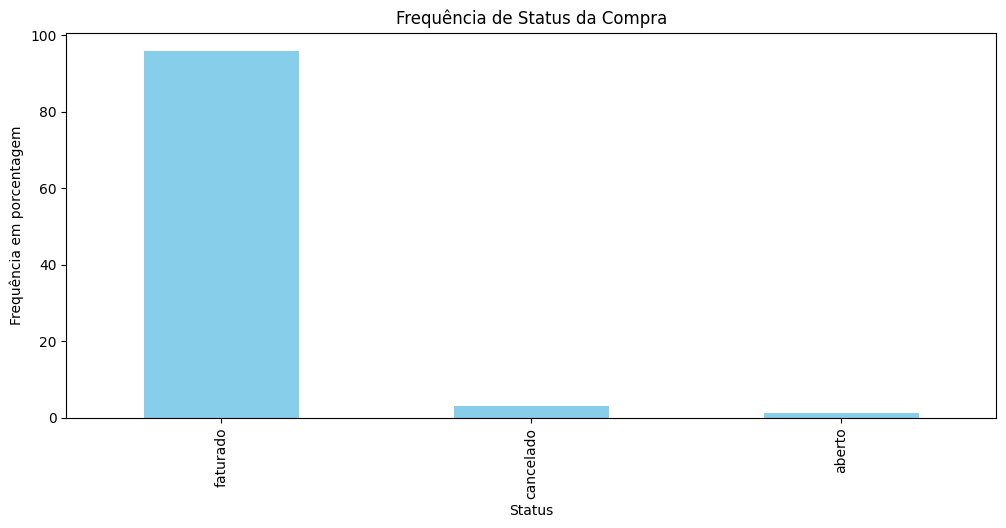

In [167]:
plt.figure(figsize=(12,5))
porc_status.plot(kind='bar', color='skyblue')
plt.title('Frequência de Status da Compra')
plt.xlabel('Status')
plt.ylabel('Frequência em porcentagem')

In [168]:
porc_status

status
faturado    95.88
cancelado    3.00
aberto       1.12
Name: proportion, dtype: float64

Text(0, 0.5, 'Frequência em Quantidades')

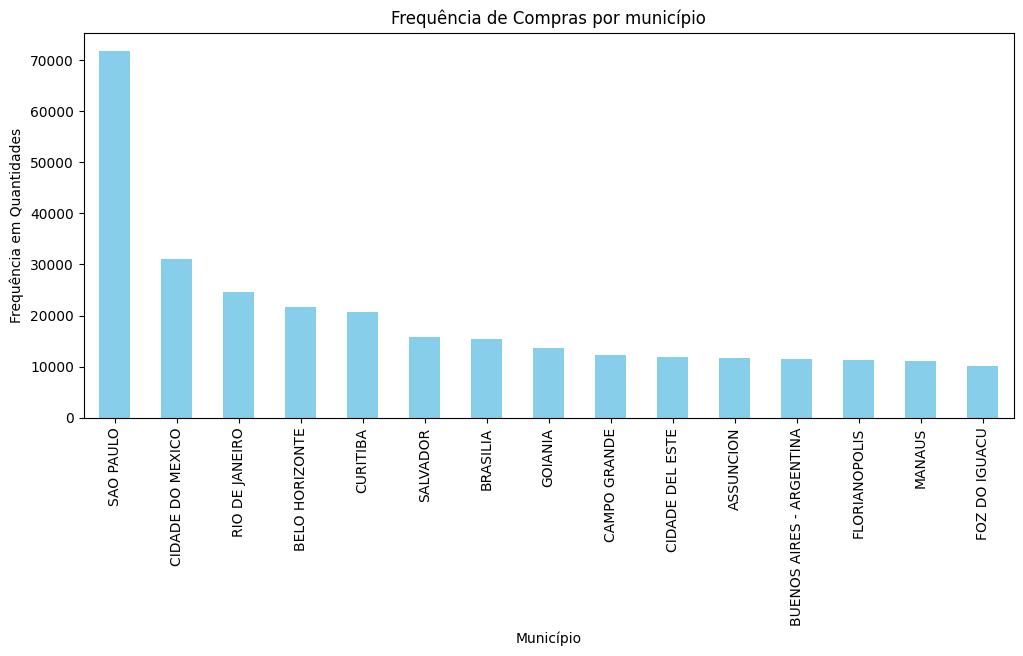

In [169]:
plt.figure(figsize=(12,5))
freqmunicipio.head(15).plot(kind='bar', color='skyblue')
plt.title('Frequência de Compras por município')
plt.xlabel('Município')
plt.ylabel('Frequência em Quantidades')

In [170]:
porc_municipio.head(15)

municipio
SAO PAULO                  3.54
CIDADE DO MEXICO           1.53
RIO DE JANEIRO             1.21
BELO HORIZONTE             1.07
CURITIBA                   1.02
SALVADOR                   0.78
BRASILIA                   0.76
GOIANIA                    0.67
CAMPO GRANDE               0.60
CIDADE DEL ESTE            0.59
ASSUNCION                  0.57
BUENOS AIRES - ARGENTINA   0.57
FLORIANOPOLIS              0.55
MANAUS                     0.55
FOZ DO IGUACU              0.50
Name: proportion, dtype: float64

In [171]:
freqmunicipio.head(15)

municipio
SAO PAULO                   71749
CIDADE DO MEXICO            30985
RIO DE JANEIRO              24524
BELO HORIZONTE              21729
CURITIBA                    20716
SALVADOR                    15814
BRASILIA                    15345
GOIANIA                     13546
CAMPO GRANDE                12187
CIDADE DEL ESTE             11851
ASSUNCION                   11608
BUENOS AIRES - ARGENTINA    11482
FLORIANOPOLIS               11198
MANAUS                      11081
FOZ DO IGUACU               10099
Name: count, dtype: int64

Text(0, 0.5, 'Frequência em Quantidade')

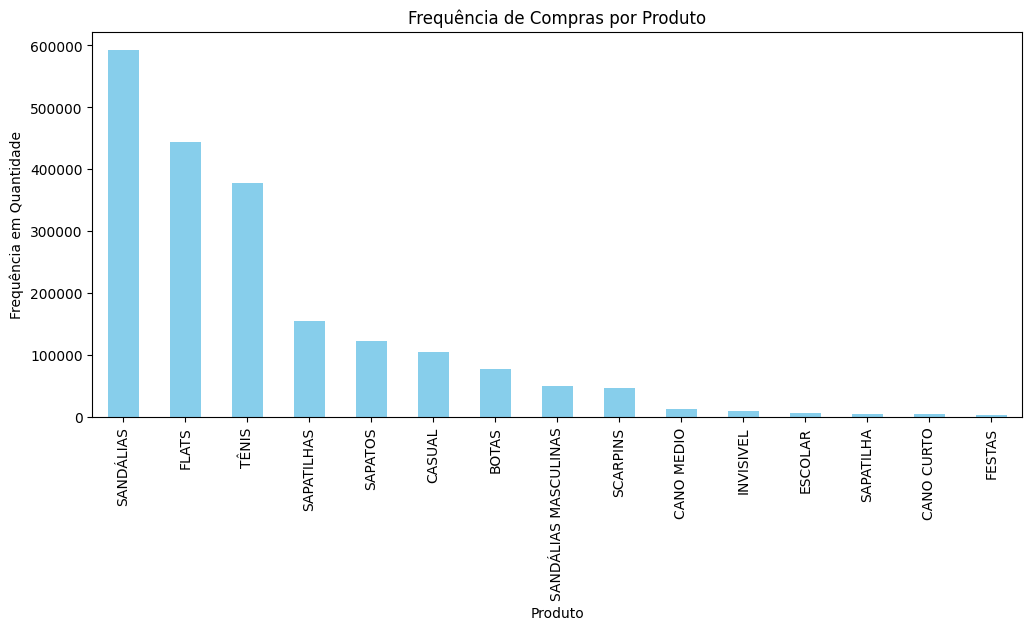

In [172]:
plt.figure(figsize=(12,5))
freqproduto.head(15).plot(kind='bar', color='skyblue')
plt.title('Frequência de Compras por Produto')
plt.xlabel('Produto')
plt.ylabel('Frequência em Quantidade')

In [173]:
porc_produto.head(15)

tipo_produto
SANDÁLIAS              29.23
FLATS                  21.94
TÊNIS                  18.67
SAPATILHAS              7.62
SAPATOS                 6.04
CASUAL                  5.17
BOTAS                   3.81
SANDÁLIAS MASCULINAS    2.44
SCARPINS                2.32
CANO MEDIO              0.66
INVISIVEL               0.44
ESCOLAR                 0.31
SAPATILHA               0.20
CANO CURTO              0.20
FESTAS                  0.15
Name: proportion, dtype: float64

In [174]:
freqproduto.head(15)

tipo_produto
SANDÁLIAS               591759
FLATS                   444218
TÊNIS                   377947
SAPATILHAS              154334
SAPATOS                 122229
CASUAL                  104703
BOTAS                    77129
SANDÁLIAS MASCULINAS     49360
SCARPINS                 47040
CANO MEDIO               13421
INVISIVEL                 8966
ESCOLAR                   6215
SAPATILHA                 4080
CANO CURTO                4011
FESTAS                    3114
Name: count, dtype: int64

Text(0, 0.5, 'Frequência em Quantidade')

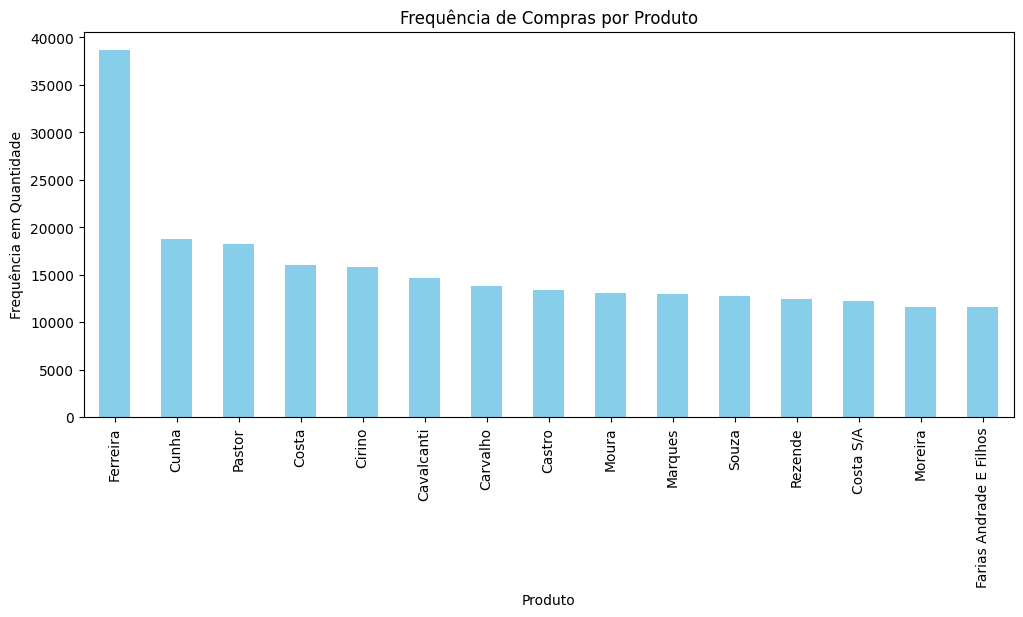

In [175]:
plt.figure(figsize=(12,5))
freqrazaosocial.head(15).plot(kind='bar', color='skyblue')
plt.title('Frequência de Compras por Produto')
plt.xlabel('Produto')
plt.ylabel('Frequência em Quantidade')

In [176]:
freqrazaosocial.head(15)

razao_social
Ferreira                   38634
Cunha                      18774
Pastor                     18277
Costa                      16028
Cirino                     15766
Cavalcanti                 14673
Carvalho                   13861
Castro                     13373
Moura                      13110
Marques                    12982
Souza                      12750
Rezende                    12452
Costa S/A                  12214
Moreira                    11649
Farias Andrade E Filhos    11618
Name: count, dtype: int64

In [177]:
porc_razaosocial.head(15)

razao_social
Ferreira                  1.91
Cunha                     0.93
Pastor                    0.90
Costa                     0.79
Cirino                    0.78
Cavalcanti                0.72
Carvalho                  0.68
Castro                    0.66
Moura                     0.65
Marques                   0.64
Souza                     0.63
Rezende                   0.62
Costa S/A                 0.60
Moreira                   0.58
Farias Andrade E Filhos   0.57
Name: proportion, dtype: float64

In [178]:
df_main.describe()

,data,item,quantidade,desconto,preco
count,2024436,2024436.00,2024436.00,2024436.00,2024436.00
mean,2024-02-16 04:47:42.920044288,3.94,18.68,0.24,54.01
min,2023-01-02 00:00:00,1.00,1.00,-0.92,2.54
25%,2023-07-31 00:00:00,1.00,12.00,-0.12,41.37
50%,2024-02-16 00:00:00,2.00,12.00,-0.08,54.03
75%,2024-09-03 00:00:00,4.00,12.00,0.00,66.01
max,2025-03-31 00:00:00,99.00,25008.00,11.45,205.22
std,NaN,6.37,67.68,1.19,21.76


RETIRANDO AS MEDIAS GERAIS

In [179]:
# Calcular média de todas as colunas numéricas
mednumb = df_main.mean(numeric_only=True)

# Calcular mediana de todas as colunas numéricas
mediananumb = df_main.median(numeric_only=True)

In [180]:
print(mednumb)
print(mediananumb)

item          3.94
quantidade   18.68
desconto      0.24
preco        54.01
dtype: float64
item          2.00
quantidade   12.00
desconto     -0.08
preco        54.03
dtype: float64


AMPLITUDE

In [181]:
dfnumb = df_main.select_dtypes(include=['number']).columns.tolist()
print (dfnumb)

['item', 'quantidade', 'desconto', 'preco']


In [182]:
df_main[dfnumb].describe()

,item,quantidade,desconto,preco
count,2024436.00,2024436.00,2024436.00,2024436.00
mean,3.94,18.68,0.24,54.01
std,6.37,67.68,1.19,21.76
min,1.00,1.00,-0.92,2.54
25%,1.00,12.00,-0.12,41.37
50%,2.00,12.00,-0.08,54.03
75%,4.00,12.00,0.00,66.01
max,99.00,25008.00,11.45,205.22


In [183]:
for variavel in dfnumb:
    amplitude = df_main[variavel].max() - df_main[variavel].min()
    print(f"A amplitude da {variavel} é: ",amplitude)

A amplitude da item é:  98
A amplitude da quantidade é:  25007
A amplitude da desconto é:  12.36986343943891
A amplitude da preco é:  202.68


In [184]:
df_main[dfnumb].var()

item           40.60
quantidade   4580.95
desconto        1.42
preco         473.40
dtype: float64

BOXPLOT PARA VISUALIZAR DADOS E OUTLIERS


In [185]:
df_main[dfnumb].quantile(0.25)


item          1.00
quantidade   12.00
desconto     -0.12
preco        41.37
Name: 0.25, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

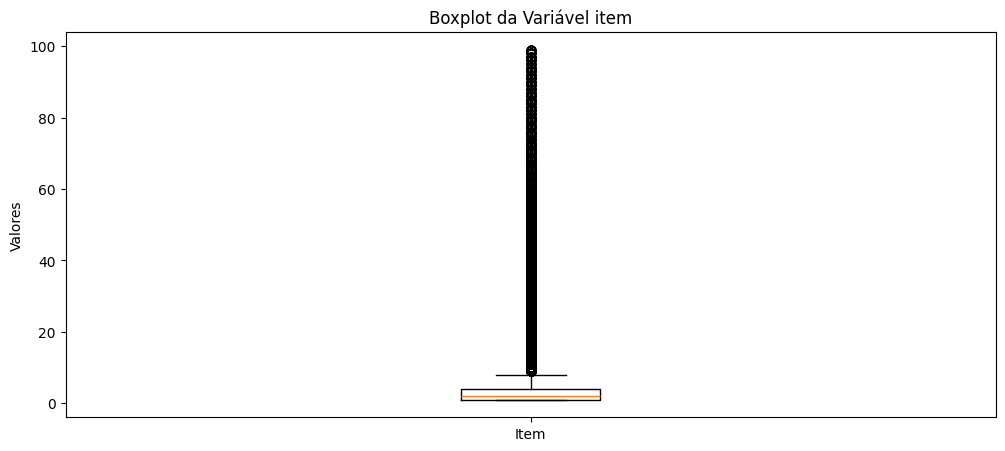

In [186]:
plt.figure(figsize=(12, 5))
plt.boxplot(df_main['item'], tick_labels=['Item'])
plt.title('Boxplot da Variável item')
plt.ylabel('Valores')
plt.show

In [187]:
print("Quantidade acima de 4:", (df_main['quantidade'] <2).sum())
print("Total de dados:", df_main['item'].count())

Quantidade acima de 4: 6649
Total de dados: 2024436


Fixando Quartis

In [188]:
Q1=df_main['item'].quantile(0.25)
Q3=df_main['item'].quantile(0.75)

In [189]:
IQR= Q3 - Q1
IQR

np.float64(3.0)

In [190]:
df_out = df_main[((df_main['item'] < (Q1 - 1.5 * IQR)) | (df_main['item'] > (Q3 + 1.5 * IQR)))]

In [191]:
print(f"Quantidade de registros na base: {len(df_main)}")
print(f"Quantidade de outliers na base: {len(df_out)}")
print(f"Percentual de outliers: {np.round(100*len(df_out)/len(df_main), 0)} %")

Quantidade de registros na base: 2024436
Quantidade de outliers na base: 170759
Percentual de outliers: 8.0 %


In [192]:
df_sem_outitem = df_main[~((df_main['item'] < (Q1 - 1.5 * IQR)) | (df_main['item'] > (Q3 + 1.5 * IQR)))]

C:\Users\Dingo\AppData\Local\Temp\ipykernel_11160\4062368713.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_sem_outitem['item'], labels=['item'])


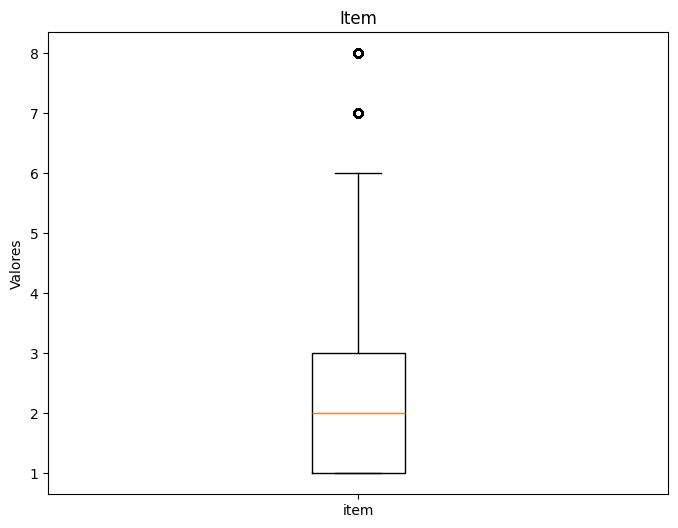

In [193]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_sem_outitem['item'], labels=['item'])
plt.title('Item')
plt.ylabel('Valores')
plt.show()

In [194]:
print((df_main['quantidade'] == 12).value_counts())

quantidade
True     1381064
False     643372
Name: count, dtype: int64


In [195]:
Q1g=df_main[dfnumb].quantile(0.25)
Q3g=df_main[dfnumb].quantile(0.75)

IQRg = Q3 - Q1
IQRg

np.float64(3.0)

In [196]:
outliers_geral = df_main[(df_main[dfnumb] < (Q1g - 1.5 * IQRg) | (df_main[dfnumb] > (Q3g + 1.5 * IQRg))).any(axis=1)]

In [197]:
print(f"Quantidade de registros na base: {len(df_main)}")
print(f"Quantidade de outliers na base: {len(outliers_geral)}")
print(f"Percentual de outliers: {np.round(100*len(outliers_geral)/len(df_main), 0)} %")

Quantidade de registros na base: 2024436
Quantidade de outliers na base: 1865378
Percentual de outliers: 92.0 %


In [198]:
df_sem_out = df_main[~((df_main[dfnumb] < (Q1 - 1.5 * IQR)) | (df_main[dfnumb] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [199]:
df_sem_out

,data,id_pedido,id_cliente,status,id_produto,item,quantidade,desconto,tipo_produto,material,cor,preco,razao_social,pais,uf,municipio
1242,2023-01-02,13871,22941,faturado,15271,2,8,-0.04,SANDÁLIAS,ELASTICO/METALIZADO PREMIUM,NUDE/OURO ROSADO,6.92,Cassiano Ltda.,BRASIL,SP,MARACAI
1328,2023-01-02,13920,15061,faturado,2624,2,7,0.00,SANDÁLIAS,NP FLOATHER NATURE/ELAST/VZ PREMIUM,PRETO,7.00,Mendes S/A,BRASIL,SP,SUZANO
1335,2023-01-02,13920,15061,faturado,3971,7,8,0.00,SANDÁLIAS,NYLON TECH,PRETO,8.23,Mendes S/A,BRASIL,SP,SUZANO
1391,2023-01-02,13996,8200,faturado,20888,2,8,-0.08,TÊNIS,NAPA SARDENHA NEO/MILANO,MARINHO/PRETO,7.98,Cavalcante Ltda.,BRASIL,MG,SANTA MARGARIDA
1544,2023-01-03,14889,7115,faturado,18744,3,8,-0.17,SAPATOS,VERNIZ PREMIUM,PRETO,8.41,Pinto Guerra E Filhos,BRASIL,PR,TELEMACO BORBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021361,2025-03-31,881493,7032,faturado,71358,5,8,4.74,FLATS,NAPA PESPONTO LISBOA/NAPA TURIM,NUDE,6.85,Gonçalves E Filhos,BOLIVIA,BO,SANTA CRUZ DE LA SIERRA
2021362,2025-03-31,881493,7032,faturado,71358,7,8,4.74,FLATS,NAPA PESPONTO LISBOA/NAPA TURIM,NUDE,6.85,Gonçalves E Filhos,BOLIVIA,BO,SANTA CRUZ DE LA SIERRA
2021518,2025-03-31,881969,15962,faturado,75265,2,8,-0.10,SAPATILHAS,NAPA GARDA,CACAU,6.63,Sá,BRASIL,PR,FOZ DO IGUACU
2022687,2025-03-31,881736,27533,faturado,47127,4,8,-0.10,FLATS,NAPA TURIM,NUDE,4.67,Barbosa,BRASIL,RJ,JAPERI


In [200]:
columns_to_use = ["desconto", "preco"]

In [201]:
df_final = df_sem_out[columns_to_use]

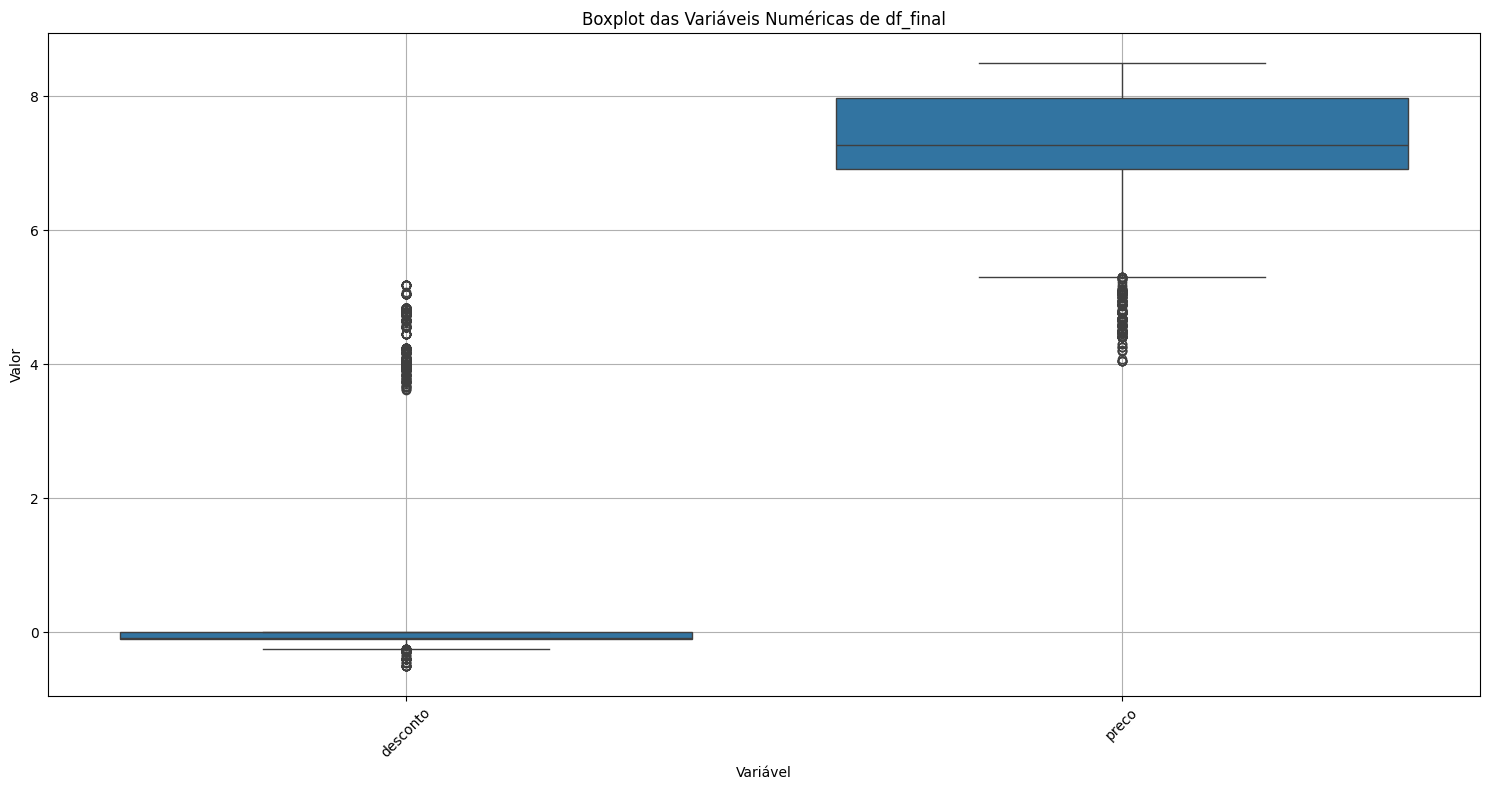

In [202]:
# Seleciona apenas colunas numéricas
colunas_numericas = df_final.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Derrete o DataFrame para formato longo
df_meltado = df_final[colunas_numericas].melt(var_name='Variável', value_name='Valor')

# Plota o boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Variável', y='Valor', data=df_meltado)
plt.title('Boxplot das Variáveis Numéricas de df_final')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Partindo para as verdadeiras análises

In [203]:
df_final.corr()

,desconto,preco
desconto,1.00,-0.05
preco,-0.05,1.00


In [204]:
df_main[dfnumb].corr()

,item,quantidade,desconto,preco
item,1.00,-0.02,0.41,-0.06
quantidade,-0.02,1.00,0.05,-0.03
desconto,0.41,0.05,1.00,-0.05
preco,-0.06,-0.03,-0.05,1.00


In [205]:
categoricas = df_main.select_dtypes(include=['object']).columns.tolist()

In [206]:
categoricas

['id_pedido',
 'id_cliente',
 'status',
 'id_produto',
 'tipo_produto',
 'material',
 'cor',
 'razao_social',
 'pais',
 'uf',
 'municipio']

In [207]:
df_main['tipo_produto'].value_counts().head(15)

tipo_produto
SANDÁLIAS               591759
FLATS                   444218
TÊNIS                   377947
SAPATILHAS              154334
SAPATOS                 122229
CASUAL                  104703
BOTAS                    77129
SANDÁLIAS MASCULINAS     49360
SCARPINS                 47040
CANO MEDIO               13421
INVISIVEL                 8966
ESCOLAR                   6215
SAPATILHA                 4080
CANO CURTO                4011
FESTAS                    3114
Name: count, dtype: int64

In [208]:
df_categorias_escolhidas = df_main[df_main["tipo_produto"].isin(["SANDÁLIAS", "FLATS", "TÊNIS", "SAPATILHAS", "SAPATOS", "CASUAL", "BOTAS", "SANDÁLIAS MASCULINAS"])]
df_categorias_escolhidas

,data,id_pedido,id_cliente,status,id_produto,item,quantidade,desconto,tipo_produto,material,cor,preco,razao_social,pais,uf,municipio
0,2023-01-02,14233,935,faturado,14676,1,12,-0.08,BOTAS,TELA VENEZA/NAPA BERLIM,PRETO,101.85,Das Neves,BRASIL,MG,ITAGUARA
1,2023-01-02,13835,20017,faturado,14786,1,16,-0.14,BOTAS,NAPA FLOATHER ZURIQUE/ELASTICO,PRETO,117.34,Alves - Ei,BRASIL,PR,CURITIBA
2,2023-01-02,13747,2192,faturado,16566,1,8,-0.08,BOTAS,METALIZADO LISBOA,GRAFITE,155.58,Fernandes,BRASIL,MG,VICOSA
3,2023-01-02,13747,2192,faturado,16438,2,8,-0.08,BOTAS,NAPA BERLIM,PRETO,144.92,Fernandes,BRASIL,MG,VICOSA
4,2023-01-02,14303,262,cancelado,8214,2,12,-0.17,SANDÁLIAS,NAPA FLOATHER NATURE,PRETO,70.43,Da Rosa,BRASIL,MG,BELO HORIZONTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024431,2025-03-31,880983,10430,aberto,67341,1,12,-0.08,SANDÁLIAS,PELICA/T P PELICA/T P PELE STRECH,BRANCO OFF,74.06,Da Cunha Costela - Ei,BRASIL,BA,SANTANA
2024432,2025-03-31,880983,10430,aberto,39036,2,12,-0.08,SANDÁLIAS,PELICA,BEGE,53.78,Da Cunha Costela - Ei,BRASIL,BA,SANTANA
2024433,2025-03-31,881440,27813,faturado,59636,3,12,-0.06,FLATS,NP FLOAT NAT/NP LEZ PARIS/TI FLOREN,CREME/BRANCO-CRISTAL,49.47,Da Rosa,BRASIL,MG,MANHUACU
2024434,2025-03-31,881440,27813,faturado,51315,2,12,-0.06,FLATS,NP FLOATHER NATURE/TIRA FLORENCA,PRETO/CRISTAL,44.45,Da Rosa,BRASIL,MG,MANHUACU


In [209]:
contingency_table = pd.crosstab(df_categorias_escolhidas['tipo_produto'], df_categorias_escolhidas['status'])
contingency_table

status,aberto,cancelado,faturado
tipo_produto,,,
BOTAS,1499,2274,73356
CASUAL,948,3272,100483
FLATS,4281,13569,426368
SANDÁLIAS,6210,17760,567789
SANDÁLIAS MASCULINAS,546,1377,47437
SAPATILHAS,1842,4570,147922
SAPATOS,1778,3629,116822
TÊNIS,4581,11350,362016


In [210]:
contingency_table2 = pd.crosstab(df_categorias_escolhidas['tipo_produto'], df_categorias_escolhidas['data'])
contingency_table2

data,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,...,2025-03-18,2025-03-19,2025-03-20,2025-03-21,2025-03-24,2025-03-25,2025-03-26,2025-03-27,2025-03-28,2025-03-31
tipo_produto,,,,,,,,,,,,,,,,,,,,,
BOTAS,353,224,297,357,682,332,542,547,422,759,...,211,233,199,226,151,212,190,145,218,279
CASUAL,37,90,209,73,225,231,349,231,266,425,...,155,154,84,157,75,122,106,87,157,270
FLATS,179,167,318,391,515,271,409,441,423,793,...,684,637,508,801,404,469,515,453,692,936
SANDÁLIAS,316,111,227,225,379,257,280,461,278,645,...,935,869,803,1182,624,683,793,790,924,1537
SANDÁLIAS MASCULINAS,27,16,5,11,31,21,25,79,30,87,...,113,108,88,101,58,144,127,71,83,137
SAPATILHAS,110,127,341,259,387,244,355,431,281,570,...,285,249,217,269,214,200,234,211,326,399
SAPATOS,165,151,207,136,268,211,308,305,293,421,...,254,191,212,318,151,206,217,137,318,430
TÊNIS,227,346,497,427,701,582,755,792,809,1181,...,666,686,550,892,434,589,682,477,776,1079


In [211]:
df_prod012023 = df_main[
    (df_main["tipo_produto"].isin(["SANDÁLIAS", "FLATS", "TÊNIS", "SAPATILHAS", "SAPATOS", "CASUAL", "BOTAS", "SANDÁLIAS MASCULINAS"])) &
    (df_main['data'].dt.month == 1) &
    (df_main['data'].dt.year == 2023)
]

In [212]:
df_prod012023

,data,id_pedido,id_cliente,status,id_produto,item,quantidade,desconto,tipo_produto,material,cor,preco,razao_social,pais,uf,municipio
0,2023-01-02,14233,935,faturado,14676,1,12,-0.08,BOTAS,TELA VENEZA/NAPA BERLIM,PRETO,101.85,Das Neves,BRASIL,MG,ITAGUARA
1,2023-01-02,13835,20017,faturado,14786,1,16,-0.14,BOTAS,NAPA FLOATHER ZURIQUE/ELASTICO,PRETO,117.34,Alves - Ei,BRASIL,PR,CURITIBA
2,2023-01-02,13747,2192,faturado,16566,1,8,-0.08,BOTAS,METALIZADO LISBOA,GRAFITE,155.58,Fernandes,BRASIL,MG,VICOSA
3,2023-01-02,13747,2192,faturado,16438,2,8,-0.08,BOTAS,NAPA BERLIM,PRETO,144.92,Fernandes,BRASIL,MG,VICOSA
4,2023-01-02,14303,262,cancelado,8214,2,12,-0.17,SANDÁLIAS,NAPA FLOATHER NATURE,PRETO,70.43,Da Rosa,BRASIL,MG,BELO HORIZONTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82953,2023-01-31,51974,2649,faturado,14182,2,8,-0.09,BOTAS,NAPA BERLIM,PRETO,112.71,Duarte,BRASIL,RS,CANDIOTA
82954,2023-01-31,51974,2649,faturado,14299,1,8,-0.09,BOTAS,NAPA GENEBRA,PINHAO,124.36,Duarte,BRASIL,RS,CANDIOTA
82955,2023-01-31,52660,1272,faturado,5142,2,12,-0.08,TÊNIS,CAMURCA FLEX,PRETO/PRETO,55.69,Aparecida,BRASIL,MT,NOBRES
82956,2023-01-31,52660,1272,faturado,5144,1,12,-0.08,TÊNIS,CAMURCA FLEX,PRETO/PRETO,38.23,Aparecida,BRASIL,MT,NOBRES


In [213]:
df_main['venda_total'] = df_main['preco'] * df_main['quantidade']

In [214]:
df_main[['venda_total', 'preco', 'quantidade']]

,venda_total,preco,quantidade
0,1222.20,101.85,12
1,1877.44,117.34,16
2,1244.64,155.58,8
3,1159.36,144.92,8
4,845.16,70.43,12
...,...,...,...
2024431,888.72,74.06,12
2024432,645.36,53.78,12
2024433,593.64,49.47,12
2024434,533.40,44.45,12


In [215]:
df_main['data'] = pd.to_datetime(df_main['data'], errors='coerce')

In [216]:
df_main['ano_mes'] = df_main['data'].dt.to_period('M')

In [223]:
df_main[['ano_mes', 'data']]

,ano_mes,data
0,2023-01,2023-01-02
1,2023-01,2023-01-02
2,2023-01,2023-01-02
3,2023-01,2023-01-02
4,2023-01,2023-01-02
...,...,...
2024431,2025-03,2025-03-31
2024432,2025-03,2025-03-31
2024433,2025-03,2025-03-31
2024434,2025-03,2025-03-31


In [217]:
vendas_mensais = df_main.groupby('ano_mes')['venda_total'].sum().reset_index()

In [218]:
vendas_mensais['data'] = vendas_mensais['ano_mes'].dt.to_timestamp()

In [219]:
print(vendas_mensais.head(15))

    ano_mes  venda_total       data
0   2023-01  70502726.89 2023-01-01
1   2023-02  68230589.84 2023-02-01
2   2023-03  62395099.80 2023-03-01
3   2023-04  41331814.88 2023-04-01
4   2023-05  56529931.95 2023-05-01
5   2023-06  70675864.41 2023-06-01
6   2023-07  66959185.30 2023-07-01
7   2023-08  84956318.55 2023-08-01
8   2023-09  87299681.38 2023-09-01
9   2023-10  65517305.71 2023-10-01
10  2023-11  57107546.81 2023-11-01
11  2023-12  49614323.98 2023-12-01
12  2024-01  86234096.55 2024-01-01
13  2024-02  88144440.27 2024-02-01
14  2024-03  72800312.49 2024-03-01


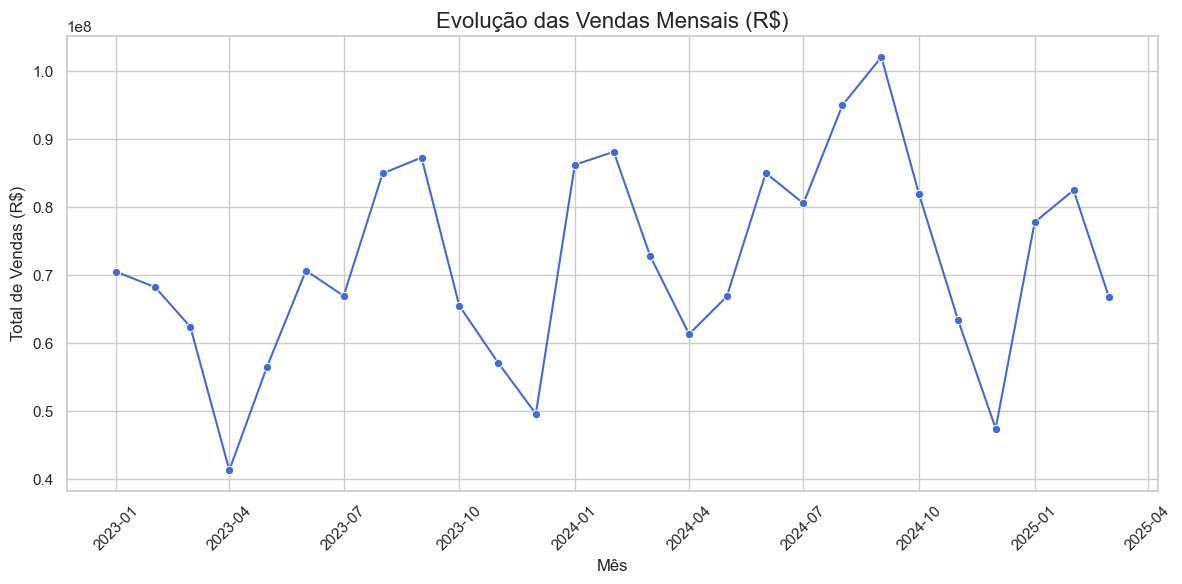

In [220]:
# Configura estilo bonito
sns.set(style='whitegrid')

# Gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendas_mensais, x='data', y='venda_total', marker='o', color='royalblue')

plt.title('Evolução das Vendas Mensais (R$)', fontsize=16)
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

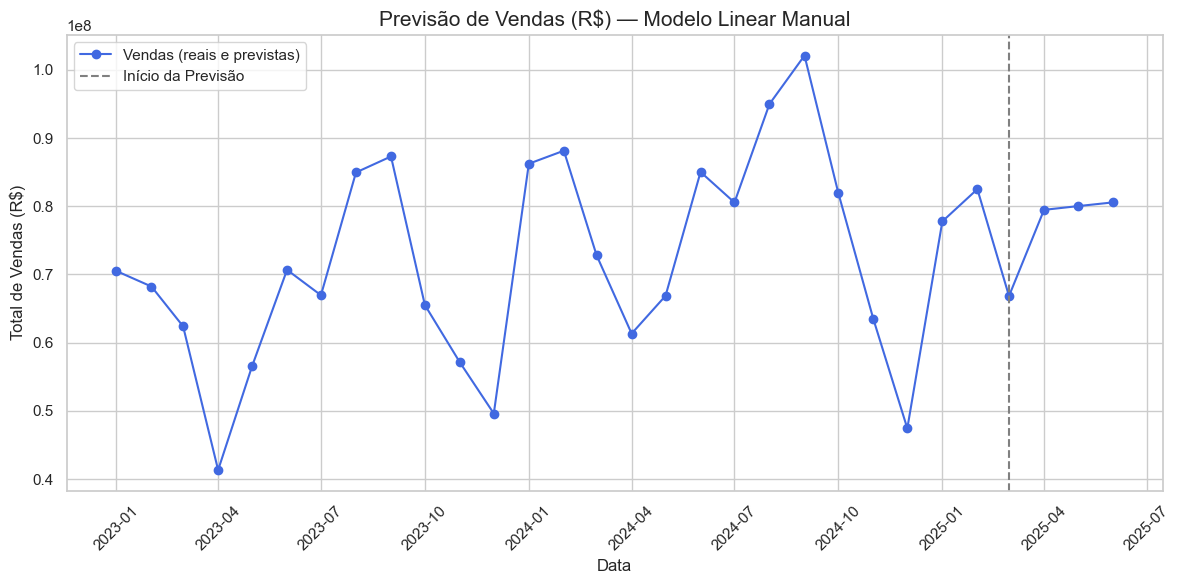

In [221]:
vendas_mensais['mes_num'] = np.arange(len(vendas_mensais))
x = vendas_mensais['mes_num'].values
y = vendas_mensais['venda_total'].values

# Passo 2: cálculo manual da regressão linear
# Fórmulas:
# a = coef angular (inclinação)
# b = coef linear (intercepto)
a = ((x - x.mean()) * (y - y.mean())).sum() / ((x - x.mean())**2).sum()
b = y.mean() - a * x.mean()

# Função da reta: y = a*x + b
# Previsão para os próximos 3 meses
meses_futuros = np.arange(len(x), len(x) + 3)
previsoes = a * meses_futuros + b

# Datas futuras
datas_futuras = pd.date_range(start=vendas_mensais['data'].max() + pd.offsets.MonthBegin(),
                              periods=3, freq='MS')

# DataFrame de previsão
df_previsao = pd.DataFrame({
    'data': datas_futuras,
    'venda_total': previsoes
})

# Unindo dados reais e previstos
df_plot = pd.concat([vendas_mensais[['data', 'venda_total']], df_previsao])

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_plot['data'], df_plot['venda_total'], marker='o', label='Vendas (reais e previstas)', color='royalblue')
plt.axvline(x=vendas_mensais['data'].max(), color='gray', linestyle='--', label='Início da Previsão')
plt.title('Previsão de Vendas (R$) — Modelo Linear Manual', fontsize=15)
plt.xlabel('Data')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()